# W2M5 - Sentiment Analysis

---

## 학습 목표
- 레이블링된 텍스트 데이터를 시각화하는 방법을 배운다.
- 작은 데이터셋을 직접 만들어서 전체 과정을 체험해 본다.

## 사전지식
- The dataset has 1.6 million tweets, with no missing values in any column.
- Each tweet has a target sentiment (0 for negative,2 neutral, 4 for positive), an ID, a timestamp, a flag (query or 'NO_QUERY'), the username, and the text.
- The sentiment targets are balanced, with an equal number of positive and negative labels.

## 기능요구사항
- Jupyter notebook에 프로세스 과정을 출력하고 결과 그래프도 출력하세요.
- Positive Sentiment, Negative Sentiment에 각각 해당하는 단어들을 모아서 word cloud를 화면에 표시하세요.
    - Word Cloud를 만들 때 사용할 단어들은 sampling을 통해서 선택하세요.
    - 하나의 word cloud에는 최대 200개의 단어만 표시하세요.

## 프로그래밍 요구사항
- pandas 라이브러리를 사용하세요
- matplotlib 라이브러리를 사용하세요
- wordcloud 라이브러리를 사용하세요
- 2개의 word cloud는 하나의 plot에 그리세요


## 팀 활동견적
- 사용자 데이터셋과 사용자 데이터셋을 웹 스크레이핑을 통해 만든 다음, 워드 클라우드를 만들면 됩니다.
    - 데이터셋을 만들 때 어떤 작업이 필요한가요?
    - 프로토타입에는 최소 1,000개 이상의 데이터를 사용하세요.
- 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있는지에 대해 토의하겠습니다.


---

# Final W2M5

/Users/admin/Documents/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


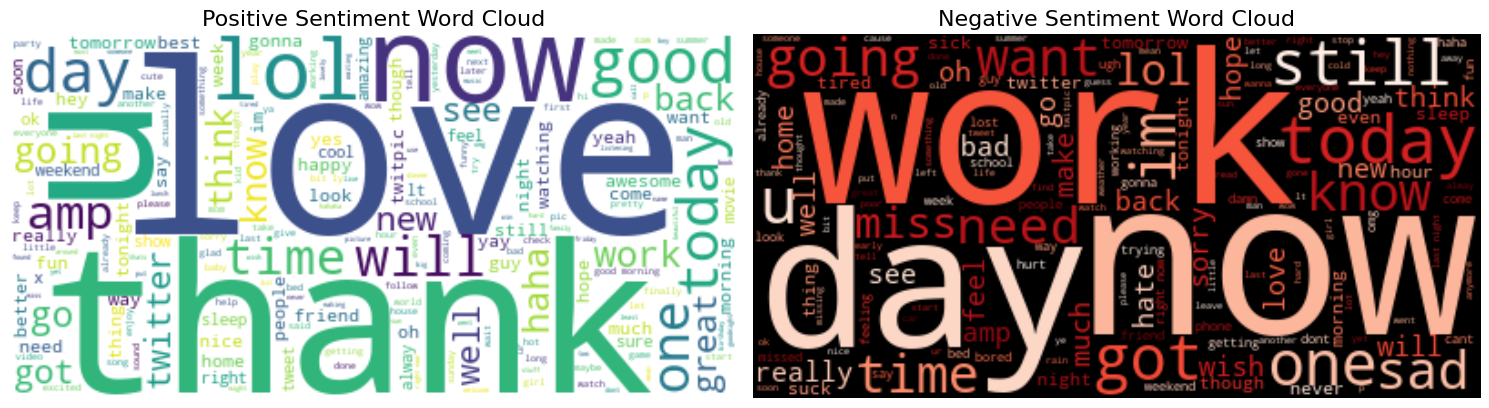

In [4]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
import zipfile
import subprocess

# sentiment140 데이터셋 다운로드
dataset_name = "kazanova/sentiment140"
os.system(f"kaggle datasets download -d {dataset_name}")

# 데이터 압축 해제
zip_file = "sentiment140.zip"
extract_dir = "sentiment140"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 데이터 로드 (추출된 CSV 파일의 경로 확인)
data_path = os.path.join(extract_dir, "training.1600000.processed.noemoticon.csv")
data = pd.read_csv(data_path, encoding='latin-1', header=None)

# 컬럼 이름 지정
data.columns = ['Sentiment', 'ID', 'Date', 'Flag', 'User', 'Text']

# Positive(4)와 Negative(0) 텍스트 필터링
positive_texts = data[data['Sentiment'] == 4]['Text']
negative_texts = data[data['Sentiment'] == 0]['Text']

# 불용어 설정
stopwords = set(STOPWORDS)
additional_stopwords = {'quote', 'example', 'quot'}  # 추가로 제거할 단어들
stopwords.update(additional_stopwords)

# 텍스트 전처리 함수
def preprocess_text(texts):
    combined_text = " ".join(texts).lower()  # 단일 문자열로 결합된 텍스트가 필요하므로 join 사용
    words = combined_text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# 전처리된 텍스트 생성 (샘플링 10,000개)
positive_words = preprocess_text(positive_texts.sample(10000))
negative_words = preprocess_text(negative_texts.sample(10000))

# Word Cloud 생성
positive_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="black", colormap="Reds").generate(negative_words)

# Word Cloud 시각화
plt.figure(figsize=(15, 8))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()

---

# M5 팀 활동 요구사항

1. 제공된 데이터셋과 유사한 데이터셋을 웹 스크레이핑을 통해 만든 다음, word cloud를 만들어 봅시다.
    - 데이터셋을 만들 때 어떤 작업들이 추가적으로 필요할까요?
    - prototyping에는 최소 1,000개 이상의 데이터를 사용하세요.

2. 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있을지에 대해 토의합시다.


## 우리의 방향
### 1번 문제
-  구글 플레이 리뷰를 스크래핑해서, 리뷰의 반응을 긍정(별점 5점) 중립(별 3-4점) 부정(1-2점)으로 나눔.
- https://play.google.com/store/apps/details?id=com.velox.hkmc_tm1k 현대 블루링크 앱을 분석하는데 사용

---

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


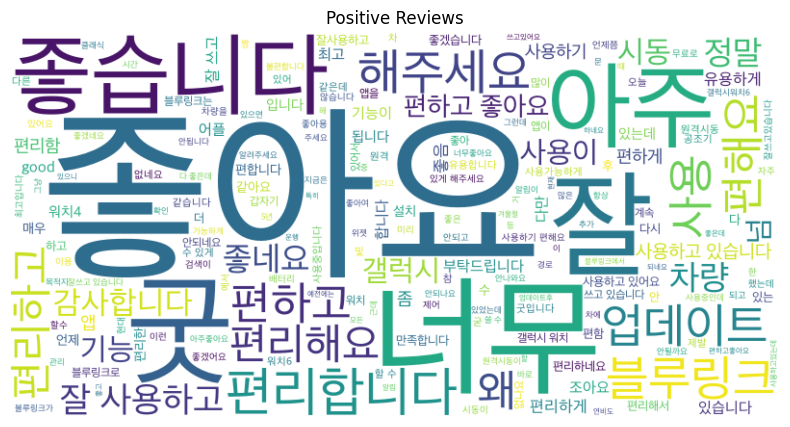

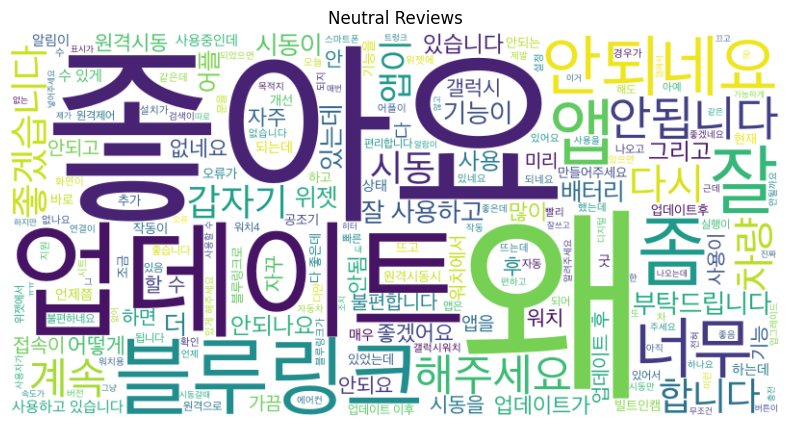

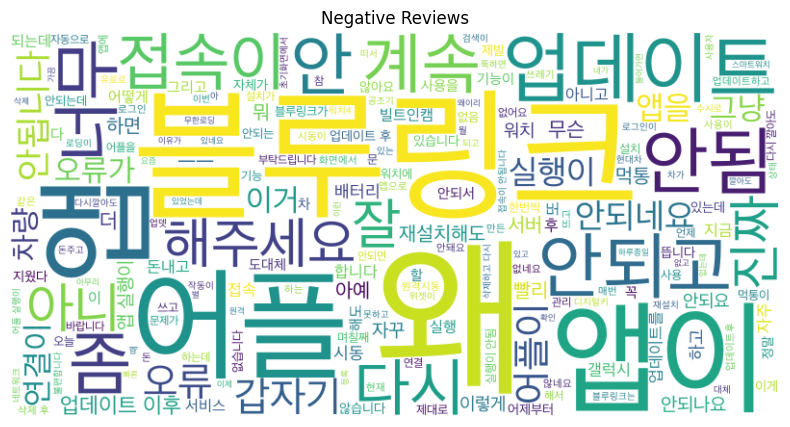

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_play_scraper import reviews_all, Sort

import re
from nltk.corpus import stopwords

# NLTK 불용어 다운로드 (최초 1회 실행 필요)
import nltk
nltk.download('stopwords')

app_id = 'com.velox.hkmc_tm1k'  
reviews = reviews_all(
    app_id,
    lang='ko',  
    country='kr', 
    sort=Sort.NEWEST  
)

# 데이터프레임 생성
df = pd.DataFrame(reviews)
df.to_csv('reviews.csv', index=False)

# 리뷰 분류
positive_reviews = df[df['score'] == 5].head(1000)
neutral_reviews = df[df['score'].isin([3, 4])].head(1000)
negative_reviews = df[df['score'].isin([1, 2])].head(1000)

def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=200,
        background_color='white',
        font_path='/System/Library/Fonts/Supplemental/AppleSDGothicNeo.ttc'  # 한글 폰트 경로 설정
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
# 긍정 리뷰 워드 클라우드
positive_text = ' '.join(positive_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(positive_text, 'Positive Reviews')

# 중립 리뷰 워드 클라우드
neutral_text = ' '.join(neutral_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(neutral_text, 'Neutral Reviews')

# 부정 리뷰 워드 클라우드
negative_text = ' '.join(negative_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(negative_text, 'Negative Reviews')